# 3. Polynomial Regression

### 공부 시간에 따른 시험 점수 (우등생)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('D:/k-digital/ML\PythonMLWorkspace(LightWeight)/ScikitLearn/PolynomialRegressionData.csv')
X = dataset.iloc[:, :-1].values #독립변수
y = dataset.iloc[:, -1].values #종속변수

## 3-1. 단순 선형 회귀 (Simple Linear Regression)

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) # 전체 데이터로 학습

LinearRegression()

### 데이터 시각화 (전체)

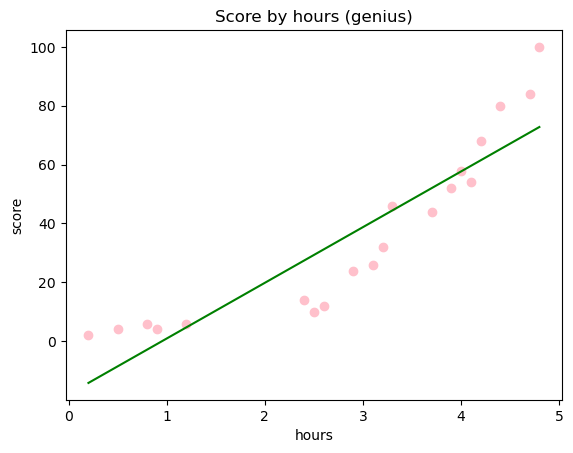

In [5]:
plt.scatter(X, y, color='Pink') # 산점도
plt.plot(X, reg.predict(X), color='green') # 선 그래프
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [5]:
reg.score(X, y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2. 다항 회귀 (Polynomial Regression)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
# 몇 차 다항식인지 설정 가능
poly_reg = PolynomialFeatures(degree=2) # 2차

#fit(새롭게 만들 feature들을 찾는 거) transform(실제로 데이터를 전환)
X_poly = poly_reg.fit_transform(X)
X_poly[:5] # [x] -> [x^0, x^1, x^2] -> x 가 3이라면 [1, 3, 9] 으로 변환

array([[1.  , 0.2 , 0.04],
       [1.  , 0.5 , 0.25],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44]])

In [9]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [10]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 변환된 X 와 y 를 가지고 모델 생성 (학습)

LinearRegression()

### 데이터 시각화 (변환된 X 와 y)

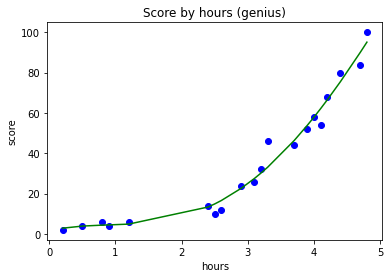

In [10]:
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='green')
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [11]:
X_range = np.arange(min(X), max(X), 0.1) # X 의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [12]:
X_range.shape

(46,)

In [13]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [14]:
X.shape

(20, 1)

In [15]:
X_range = X_range.reshape(-1, 1) # row 개수는 자동으로 계산, column 개수는 1개
X_range.shape

(46, 1)

In [16]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

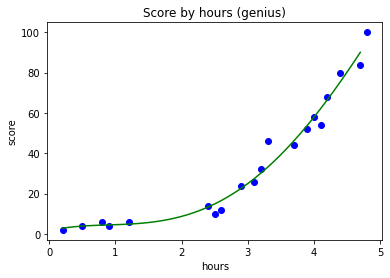

In [17]:
plt.scatter(X, y, color='blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green')
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [18]:
reg.predict([[2]]) # 2시간을 공부했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [19]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 때 다항 회귀 모델의 예측

array([8.70559135])

In [20]:
lin_reg.score(X_poly, y)

0.9782775579000045